# codecentric.AI Bootcamp - Neuronale Netze

## Aufgaben + Lösungen

Hier findet ihr die Lösungen zu den Neuronale Netze Aufgaben.

Die folgenden Pakete werden geladen:

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Aufgabe 1: H2O

- Lade die H2O Bibliothek und initialisiere das Cluster.

In [22]:
import h2o
h2o.init(nthreads = -1)

from h2o.estimators.deeplearning import H2ODeepLearningEstimator

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 min 10 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.8
H2O cluster version age:,1 month and 21 days
H2O cluster name:,H2O_from_python_unknownUser_b85pxn
H2O cluster total nodes:,1
H2O cluster free memory:,430.8 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


### Aufgabe 2: Daten

- Gehe zu [dieser Kaggle Seite](https://www.kaggle.com/nisargpatel/automobiles) und lade die .csv Datei herunter.
- Lese die .csv Datei mit pandas ein.

In [23]:
auto_data = pd.read_csv("/data/Automobile.csv")
auto_data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Um hier ein Klassifikationsbeispiel zu zeigen, wandeln wir die Variable `price` in 3 Kategorien um:

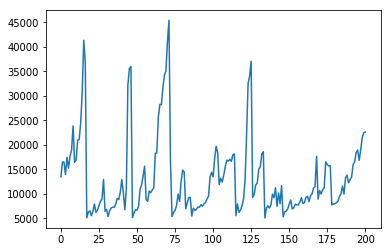

In [24]:
auto_data.price.plot()

In [25]:
auto_data.price = pd.cut(auto_data.price, 3, labels=["low", "medium", "high"])

- Wandle das pandas DataFrame in ein H2O Frame um.

In [26]:
hf = h2o.H2OFrame(auto_data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


### Aufgabe 3: Vorbereitung des Modells

- Definiere die Antwortvariable für Regression: `price`.

In [27]:
hf_y = hf.col_names[25]
hf_y

'price'

- Definiere die verbleibenden Variablen als Feature.

In [28]:
hf_X = hf.col_names[1:len(hf.col_names)-1]
hf_X

['normalized_losses',
 'make',
 'fuel_type',
 'aspiration',
 'number_of_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_type',
 'number_of_cylinders',
 'engine_size',
 'fuel_system',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg']

### Aufgabe 4: H2ODeepLearningEstimator

Nutze, die [H2O Deep Learning Estimator Dokumentation](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2odeeplearningestimator), um den H2ODeepLearningEstimator mit folgenden Argumenten und Hyperparametern zu definieren:

- Aktivierungsfunktion: Maxout mit Dropout
- 2 Versteckte Schichten mit 20 und 10 Knoten
- Dropout in versteckten Schichten: 30%
- Kreuzentropie Loss
- 300 Epochen
- Lernrate: 0.01
- Adaptive Lernrate
- L1- & L2-Regularisierung: 0.001
- 5x Kreuzvalidierung

In [29]:
dl_model = H2ODeepLearningEstimator(
    activation = "MaxoutWithDropout",
    hidden = [20, 10, 5],
    hidden_dropout_ratios = [0.3, 0.3, 0.3],
    loss = "CrossEntropy",
    epochs = 300,
    rate = 0.01,
    adaptive_rate = True,
    l1 = 0.001,
    l2 = 0.001,
    nfolds = 5,
    keep_cross_validation_predictions = True,
    balance_classes = True,
    seed = 42
)

- Trainiere das Modell.

In [30]:
dl_model.train(x = hf_X, 
               y = hf_y, 
               training_frame = hf)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [31]:
dl_model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1542018376338_3


ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.04493859891795724
RMSE: 0.2119872612162279
LogLoss: 0.14927203831157743
Mean Per-Class Error: 0.0745123822046899
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



high,low,medium,Error,Rate
169.0,0.0,0.0,0.0,0 / 169
0.0,152.0,19.0,0.1111111,19 / 171
0.0,19.0,150.0,0.1124260,19 / 169
169.0,171.0,169.0,0.0746562,38 / 509


Top-3 Hit Ratios: 


k,hit_ratio
1,0.9253438
2,1.0
3,1.0



ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.10781335117415376
RMSE: 0.32834943455738397
LogLoss: 0.4538477479504027
Mean Per-Class Error: 0.1871345029239766
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



high,low,medium,Error,Rate
10.0,0.0,2.0,0.1666667,2 / 12
1.0,151.0,19.0,0.1169591,20 / 171
1.0,4.0,13.0,0.2777778,5 / 18
12.0,155.0,34.0,0.1343284,27 / 201


Top-3 Hit Ratios: 


k,hit_ratio
1,0.8656716
2,0.9950249
3,1.0


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.8619087,0.0510619,0.8055556,0.8363636,0.8055556,1.0,0.8620689
err,0.1380912,0.0510619,0.1944444,0.1636364,0.1944444,0.0,0.1379310
err_count,5.4,2.2181072,7.0,9.0,7.0,0.0,4.0
logloss,0.5050508,0.2283552,0.4577030,0.3438173,0.8069472,0.0124518,0.9043348
max_per_class_error,0.4,0.1598611,0.6666667,0.3333333,0.5,0.0,0.5
mean_per_class_accuracy,0.8030681,0.0709342,0.7222222,0.7725768,0.7745098,1.0,0.7460318
mean_per_class_error,0.1969319,0.0709342,0.2777778,0.2274232,0.2254902,0.0,0.2539683
mse,0.1143399,0.0424513,0.1442499,0.1089821,0.1744841,0.0016578,0.1423257
r2,-0.1027710,0.8127872,0.1345009,0.2438741,-2.3254616,0.9873795,0.4458524
rmse,0.3091233,0.0969090,0.3798024,0.3301244,0.4177130,0.0407160,0.3772607


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error
,2018-11-12 10:27:34,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan
,2018-11-12 10:27:34,6.746 sec,55934 obs/sec,10.0,1,5090.0,0.3529866,1.9283549,0.8123634,0.1277014
,2018-11-12 10:27:35,8.251 sec,99993 obs/sec,310.0,31,157790.0,0.2119873,0.1492720,0.9323262,0.0746562


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
number_of_cylinders.two,0.7232397,1.0,0.0300086
normalized_losses,0.7181569,0.9929723,0.0297977
body_style.hatchback,0.6653745,0.9199917,0.0276076
fuel_system.4bbl,0.6404521,0.8855324,0.0265735
number_of_cylinders.eight,0.6251929,0.8644339,0.0259404
---,---,---,---
drive_wheels.missing(NA),0.0,0.0,0.0
engine_location.missing(NA),0.0,0.0,0.0
number_of_doors.missing(NA),0.0,0.0,0.0
fuel_type.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()


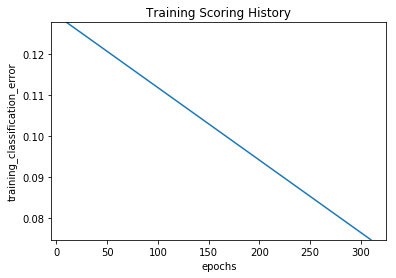

In [32]:
dl_model.plot()

In [33]:
h2o.shutdown(prompt=False)

[WARNING] in <ipython-input-33-02ff3806b010> line 1:
    >>> h2o.shutdown(prompt=False)
        ^^^^ Deprecated, use ``h2o.cluster().shutdown()``.
H2O session _sid_b218 closed.
